<a href="https://colab.research.google.com/github/mordor-ai/M2-MIASHS-DIVERS/blob/main/YedroudjNet_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yedroudj-Net
*Un réseau de neurones convolutionnel pour la Stéganalyse*

Ce TP est à rendre à l'adresse suivante [hugo.ruiz@lirmm.fr](mailto:hugo.ruiz@lirmm.fr) pour le **10 janvier 2020 à 23h59**.

*(Ce TP a été créé par Mehdi YEDROUDJ & Hugo RUIZ)*

## Import des paquets nécessaire

In [ ]:
%tensorflow_version 2.x
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Lambda
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Dense,ReLU
from tensorflow.keras.layers import Flatten,BatchNormalization
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import drive
print(tf.__version__)


## Monter son espace Drive dans le Notebook

Nous allons devoir utiliser une base de données (BDD). Pour l'utiliser, il faut l'héberger chacun sur notre Drive afin que le Notebook puisse y accéder.

*La BDD que je vais vous transmettre fait environ 1.3G, vérifiez que vous vae l'espace nécessaire sur votre Drive.*

In [ ]:
!nvidia-smi
drive.mount('/content/drive')
TP_PATH = "/content/drive/MyDrive/" + "path/to/TP/folder"

## Architecture du Yedroudj-Net

### Filtres SRM

Pour plus de détails sur ce réseau, il est possible de retrouver le GitHub [ici](https://github.com/yedmed/steganalysis_with_CNN_Yedroudj-Net).

Avant de créer le Yedroudj-Net, il faut télécharger les filtres SRM (Spatial Rich Model). Ils sont disponibles [ici](https://drive.google.com/file/d/17dgfinpcfpW_l8CSza-nKgfyrXZ-K0QW/view?usp=sharing). Ces fichiers sont utilisés dans le réseau et font le premier filtrage afin de gagner du temps à l'apprentissage.

Merci de les mettre au chemin suivant :

`/content/drive/MyDrive` + `/path/to/rich_model.txt`

### Création du réseau

L'architeture à reproduire est la suivante :
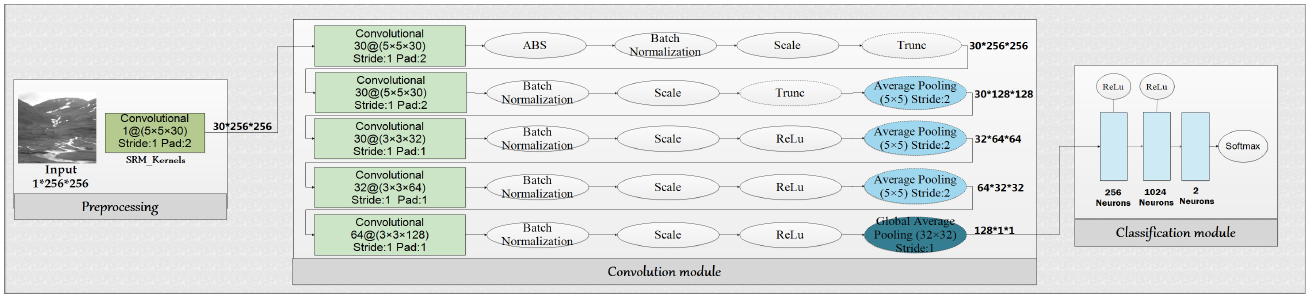

In [ ]:
def make_model():
    """
    Fonction qui créé complètement le réseau de neurones.
    En partant du chargement des filtres SRM, la partie pre-processing jusqu'à la dernière couche du réseau.
    :return: le model complet
    """
    # À compléter

model = make_model()  # Création du réseau
model.summary()  # Permet d'afficher dans la console l'architecture crééé


## Préparation de la BDD

Dans ce TP nous allons utiliser la BDD **BOSS** qui a été stéganographiée avec l'algorithme d'insertion S-UNIWARD à un payload de 0.4bpp.

Je vous ai préparé le fichier de la base afin que n'ayez plus qu'à la télécharger et la mettre dans votre Drive. [Télécharger la base ici.](https://drive.google.com/file/d/1I1SXHslBoi-xuDnbHCtsb6CxgYZhu4D9/view?usp=sharing) 


Une fois téléchargée, veuillez la mettre dans chemin comme ça :

`/content/drive/MyDrive` + `/path/to/data`

Pour obtenir ceci par exemple: 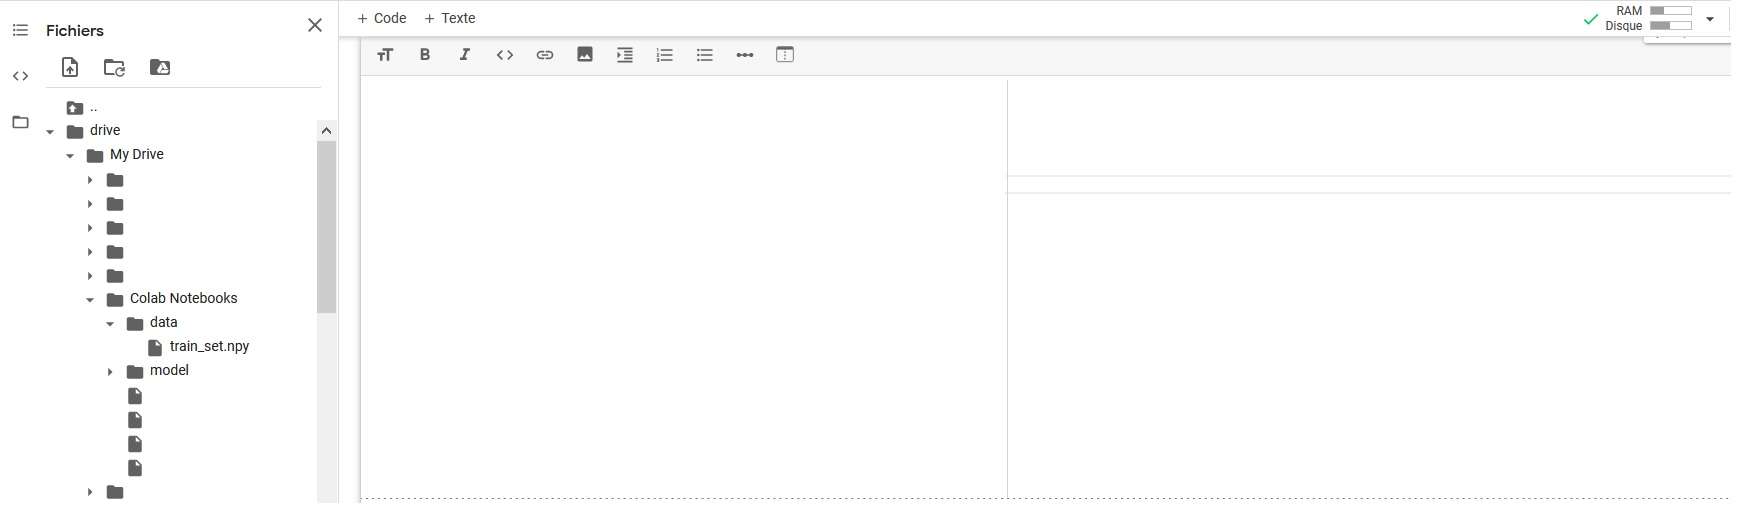 

Nous allons changer la forme de la BDD. Le vecteur images doit avoir le format suivant : (**batch**, **height**, **width**, **channel**). Le vecteur des labels doit être (**batch**, **classes**).





### Répartition des images
Dans la base téléchargée, il faut récupérer les 10k dernières images pour faire la base de test (TST), le reste fera la base de train (TRN).

Parmi les images de TRN, il faut prendre certaines images pour faire les images de validation (VAL). Cette partie va servir à évaluer l'apprentissage du modèle à la fin de chaque epoch. Il faut prendre les 2k dernières images de TRN.

In [ ]:
IMG_SIZE = 256

train_set = TP_PATH + 'data/'

data = np.load(train_set + 'train_set.npy', allow_pickle=True)
# print(len(data))
# Préparation de sets TRN/TST/VAL (à faire)

# Préparation des sets à donner au model.fit()
X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y_train = np.array([i[1] for i in train]).reshape(-1, 2)

X_val = np.array([i[0] for i in val]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y_val = np.array([i[1] for i in val]).reshape(-1, 2)

X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y_test = np.array([i[1] for i in test]).reshape(-1, 2)

print(X_train.shape)  # Affichage du format du set TRN

/content/drive/MyDrive/Teaching/UPV/TP_Deep_YedroudjNet/data/train_set.npy
(8000, 256, 256, 1)


## Entraînement du modèle

Maintenant que nous avons créé l'architecture complète du modèle, il est possible de l'entraîner.

### *Learning Rate* & Optimiseur
Pour l'optimiseur, nous allons utiliser le **SGD** (`keras.optimizers.SGD`) avec un *learning rate* (LR) qui varie exponentiellement. Keras permet de paramètrer ce LR avec la fonction `keras.optimizers.schedules.ExponentialDecay` :
- `initial_learning_rate = 0.1`
- `decay_steps = 8000`
- `decay_rate = 0.1`
- `staircase = True`

In [ ]:
# Paramètrer le LR (à faire)
# Paramètrer l'optimiseur (à faire)

### Compilation
Une fois l'optimiseur créé, il faut compiler le modèle en lui demandant comment il va se comporter. Il faut donc lui fournir l'optimiseur, bien évidemment, mais aussi la loss qui veut être utilisée ainsi que les métrics que nous souhaitons obtenir pour l'observation.

- `loss = 'categorical_crossentropy'`
- `metrics = ['accuracy']`

Il est possible d'en sortir d'autres mais c'est pour le TensorBoard (ce que nous allons pas voir dans ce TP)

### Fit
La fonction `fit` permet l'entraînement du modèle. Les paramètres que nous donnons à cette fonction vont avoir une influence sur la durée de l'apprentissage.

Le `batch_size` est le nombre d'images vues en simultanées, plus il y a en a, plus c'est rapide à parcourir la base. En revanche, il faut avoir un espace mémoire GPU suffisamment grand pour pouvoir charger autant de données. Si la GPU est surchargée, l'apprentissage sera plus lent. Cette valeur doit toujours être paire car nous devons prendre la cover mais aussi la stego, ici, nous prendrons la valeur `batch_size = 32`.

Le nombre d'`epochs` est le nombre de fois que la base sera parcourue entièrement. Par exemple, pour avoir le temps d'une epoch, il suffit de faire : `np.floor(len(BDD) / batch_size) * batch_time`

In [ ]:
# Compiler le modèle (à faire)
# Entraînement du modèle (à faire)
model.save(TP_PATH + 'model')  # Enregistrement du modèle

## Chargement d'un modèle pré-entraîné

Pour l'entraînement complet du modèle créé, il faut environ 6 heures, nous n'avons pas assez de temps pour le faire. Pour alier ce problème, il est possible de charger un modèle qui a déjà été entraîné auparavant. Vous pouvez le télécharger [ici](https://drive.google.com/drive/folders/1CY0tBbvbBlTvDtSTNOK1bUrJe3ICVNkn?usp=sharing).

Pareil qu'avant, une fois téléchargé veuillez le mettre au chemin suivant :

`/content/drive/MyDrive` + `/path/to/model`

Vous devriez donc avoir une arborescence similaire à celle-ci :

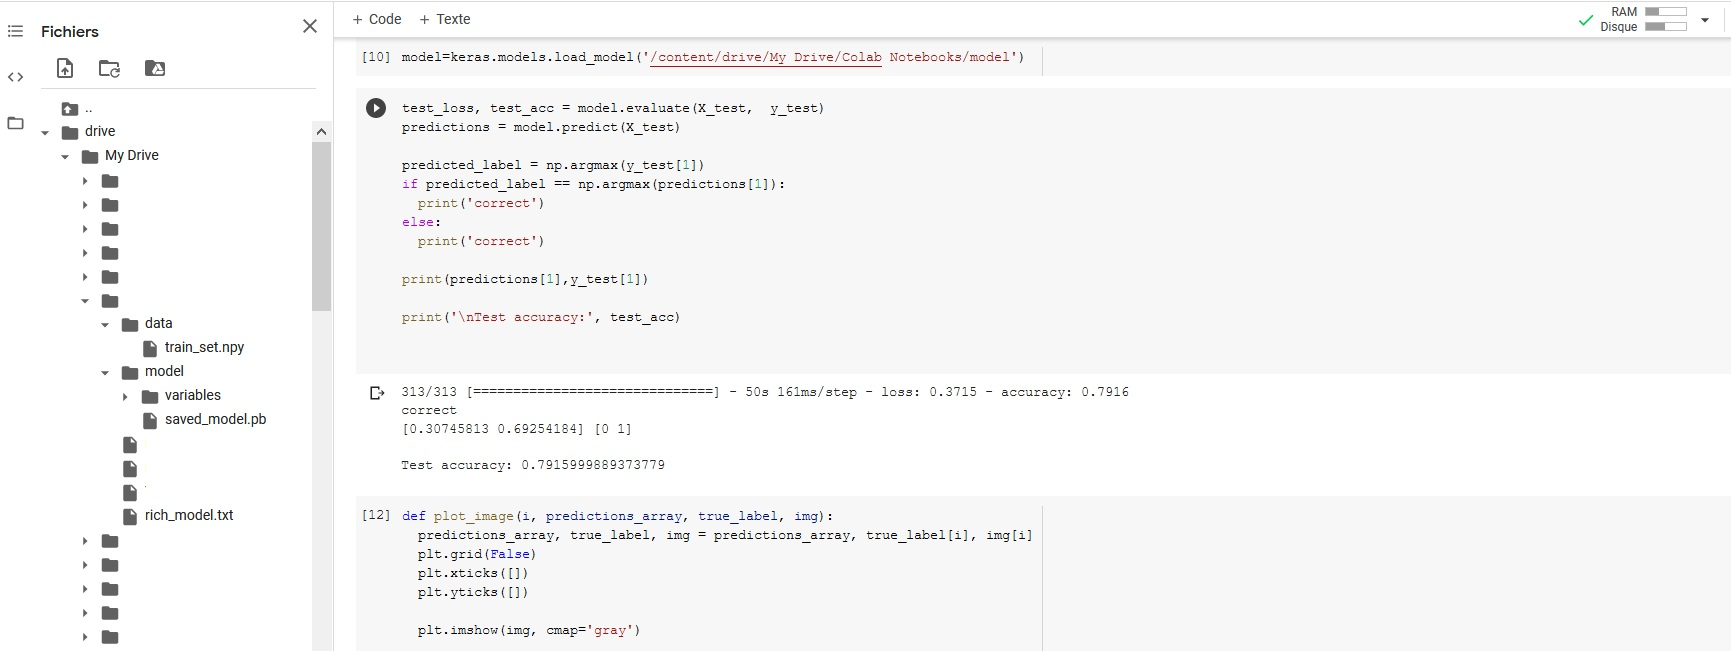

Il est possible de charger un réseau avec la fonction `keras.models.load_model()`

In [ ]:
# Charger le modèle déjà entraîné (à faire)

## Évaluation du modèle

Après que le modèle ait fini son entraînement, il faut l'évaluer sur la partie `test`. La fonction `model.evaluate()` sert exactement à ça.

Concernant les prédictions du modèle, il faut utiliser la fonction `model.predict()` sur les données de TST.

In [ ]:
# Évaluer le modèle (à faire)
# Récupérer les prédiction (à faire)

# Afficher si la prédiction est bonne ou mauvaise pour une image aléatoire dans le set TST (à faire)


### Affichage des images
Faire en sorte que les images soient affichées avec une couleur dépendante du résultat.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    """
    Permet le plot d'afficher une image, la prédiction des labels, le vrai label
    :param i: index de l'image
    :param predictions_array: valeurs des prédictions des classes pour l'image d'index i
    :param true_label: le vrai label
    :param img: données de l'image
    """
    # À récupérer du "tuto" ou refaire à vos goûts

### Affichage des prédictions
Dans cette partie, nous allons voir les prédictions de notre modèle sur le set TST. Pour ce faire, nous allons utiliser les précédentes fonctions afin de faire afficher un certain nombre d'images tirées aléatoirement grâce à la fonction `plot_image()`.

In [ ]:
# Format des sets
train_images = X_train.reshape((8000, 256, 256))
test_images = X_test.reshape((10000, 256, 256))
class_names=['Cover','Stego']

# Paramètres pour l'affichage
num_rows = 7
num_cols = 6
num_images = num_rows*num_cols

# Création d'une grille
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Affichage de chaque image
for i in range(num_images):
  idx=random.randint(0, 9999)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(idx, predictions[idx], y_test, test_images)

# Rendu final
plt.tight_layout()
plt.show()